<a href="https://colab.research.google.com/github/grace1996-beep/week_14_core/blob/main/Anomaly_detection_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly detection 

# Defining the reserch question
1. To perform anomaly detection
# Defining the metrics of success
1. Loading the dataset

2. Performing anomaly detection



In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# Installing anomalize package
# ---
# 
install.packages("anomalize")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/numDeriv_2016.8-1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 76053 bytes (74 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

In [ ]:
%%R
# Load tidyverse and anomalize
# ---
# 
library(tidyverse)
library(anomalize)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: ══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [41]:
%%R
pkg <- c('tidyverse','tibbletime','timetk')
install.packages(pkg)
library(tidyverse)
library(tibbletime)
library(timetk)

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

**loading the dataset**

In [110]:
%%R
df <- read.csv("http://bit.ly/CarreFourSalesDataset")
head(df)

       Date    Sales
1  1/5/2019 548.9715
2  3/8/2019  80.2200
3  3/3/2019 340.5255
4 1/27/2019 489.0480
5  2/8/2019 634.3785
6 3/25/2019 627.6165


In [59]:
%%R
#checking the structure of df
str(df)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [60]:
%%R
#selecting columns to be used
df <- df %>% select(Date,Sales)
head(df)

       Date    Sales
1  1/5/2019 548.9715
2  3/8/2019  80.2200
3  3/3/2019 340.5255
4 1/27/2019 489.0480
5  2/8/2019 634.3785
6 3/25/2019 627.6165


In [64]:
%%R
#changing the date format
dates <- df$Date
df$Date <- as.Date(dates,
  format = "%m/%d/%y")
df


           Date     Sales
1    2020-01-05  548.9715
2    2020-03-08   80.2200
3    2020-03-03  340.5255
4    2020-01-27  489.0480
5    2020-02-08  634.3785
6    2020-03-25  627.6165
7    2020-02-25  433.6920
8    2020-02-24  772.3800
9    2020-01-10   76.1460
10   2020-02-20  172.7460
11   2020-02-06   60.8160
12   2020-03-09  107.1420
13   2020-02-12  246.4875
14   2020-02-07  453.4950
15   2020-03-29  749.4900
16   2020-01-15  590.4360
17   2020-03-11  506.6355
18   2020-01-01  457.4430
19   2020-01-21  172.2105
20   2020-03-11   84.6300
21   2020-02-25  451.7100
22   2020-03-05  277.1370
23   2020-03-15   69.7200
24   2020-02-17  181.4400
25   2020-03-02  279.1845
26   2020-03-22  441.7560
27   2020-02-08   35.1960
28   2020-03-10  184.1070
29   2020-01-25  463.8900
30   2020-03-15  235.2105
31   2020-02-25  494.1825
32   2020-01-28  737.7615
33   2020-01-10  703.7520
34   2020-03-15  202.8180
35   2020-02-06  417.5640
36   2020-01-07   71.5260
37   2020-03-10  328.7550
38   2020-01

In [81]:
%%R
dl <- df %>% select(Date,Sales)
head(dl)

        Date    Sales
1 2020-01-05 548.9715
2 2020-03-08  80.2200
3 2020-03-03 340.5255
4 2020-01-27 489.0480
5 2020-02-08 634.3785
6 2020-03-25 627.6165


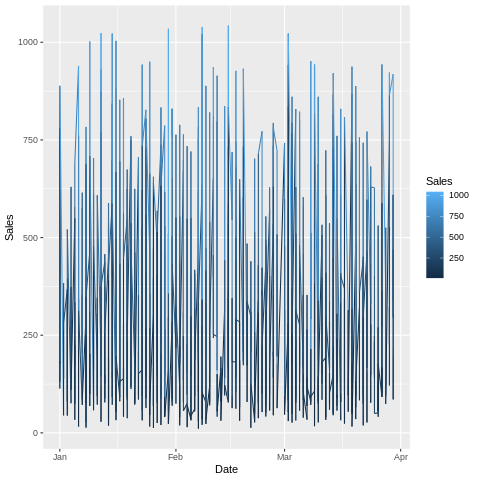

In [83]:
%%R
#Plotting data
library(ggplot2)
ggplot(dl, aes(x=Date, y=Sales,color=Sales)) + geom_line()


In [82]:
%%R
#changing dl to a tibble
btc_ts <- dl %>% rownames_to_column() %>% as.tibble()
head(btc_ts)

# A tibble: 6 x 3
  rowname Date       Sales
  <chr>   <date>     <dbl>
1 1       2020-01-05 549. 
2 2       2020-03-08  80.2
3 3       2020-03-03 341. 
4 4       2020-01-27 489. 
5 5       2020-02-08 634. 
6 6       2020-03-25 628. 


In [109]:
%%R
#checking for anomalies
m <- dl %>%
tk_anomaly_diagnostics(Date,Sales)
    
m

R[write to console]: frequency = 11 observations per 1 hour

R[write to console]: trend = 20 observations per 12 hours



# A tibble: 1,000 x 11
   Date       observed   season trend remainder seasadj remainder_l1
   <date>        <dbl>    <dbl> <dbl>     <dbl>   <dbl>        <dbl>
 1 2020-01-05    549.  -22.4     470.     101.    571.         -987.
 2 2020-03-08     80.2  57.0     457.    -434.     23.2        -987.
 3 2020-03-03    341.   21.4     445.    -125.    319.         -987.
 4 2020-01-27    489.    0.0528  432.      56.9   489.         -987.
 5 2020-02-08    634.    6.79    420.     208.    628.         -987.
 6 2020-03-25    628.  -32.6     410.     251.    660.         -987.
 7 2020-02-25    434.  -15.7     400.      49.8   449.         -987.
 8 2020-02-24    772.  -22.3     393.     401.    795.         -987.
 9 2020-01-10     76.1   8.88    387.    -320.     67.3        -987.
10 2020-02-20    173.  -13.2     381.    -195.    186.         -987.
# … with 990 more rows, and 4 more variables: remainder_l2 <dbl>,
#   anomaly <chr>, recomposed_l1 <dbl>, recomposed_l2 <dbl>


The anomalize() function is used to detect outliers in a distribution with no trend or seasonality present. It takes the output of time_decompose(), which has be de-trended and applies anomaly detection methods to identify outliers.

In [98]:
%%R
#using the anomalize() to check for anomalies
dt<-anomalize(
  btc_ts,
  Sales,
  method = c("iqr", "gesd"),
  alpha = 0.05,
  max_anoms = 0.2,
  verbose = TRUE
)
dt

$anomalized_tbl
# A tibble: 1,000 x 6
   rowname Date       Sales Sales_l1 Sales_l2 anomaly
   <chr>   <date>     <dbl>    <dbl>    <dbl> <chr>  
 1 1       2020-01-05 549.     -916.    1512. No     
 2 2       2020-03-08  80.2    -916.    1512. No     
 3 3       2020-03-03 341.     -916.    1512. No     
 4 4       2020-01-27 489.     -916.    1512. No     
 5 5       2020-02-08 634.     -916.    1512. No     
 6 6       2020-03-25 628.     -916.    1512. No     
 7 7       2020-02-25 434.     -916.    1512. No     
 8 8       2020-02-24 772.     -916.    1512. No     
 9 9       2020-01-10  76.1    -916.    1512. No     
10 10      2020-02-20 173.     -916.    1512. No     
# … with 990 more rows

$anomaly_details
$anomaly_details$outlier
 25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25% 
"No" "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" "No" 
 25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25%  25% 
"No" 

In [101]:
%%R
#using the anomalize() to check for anomalies
anomalies <-anomalize(
  btc_ts,
  Sales,
  method = c("iqr", "gesd"),
  alpha = 0.05,
  max_anoms = 0.2,
  verbose = FALSE
)
anomalies

# A tibble: 1,000 x 6
   rowname Date       Sales Sales_l1 Sales_l2 anomaly
   <chr>   <date>     <dbl>    <dbl>    <dbl> <chr>  
 1 1       2020-01-05 549.     -916.    1512. No     
 2 2       2020-03-08  80.2    -916.    1512. No     
 3 3       2020-03-03 341.     -916.    1512. No     
 4 4       2020-01-27 489.     -916.    1512. No     
 5 5       2020-02-08 634.     -916.    1512. No     
 6 6       2020-03-25 628.     -916.    1512. No     
 7 7       2020-02-25 434.     -916.    1512. No     
 8 8       2020-02-24 772.     -916.    1512. No     
 9 9       2020-01-10  76.1    -916.    1512. No     
10 10      2020-02-20 173.     -916.    1512. No     
# … with 990 more rows


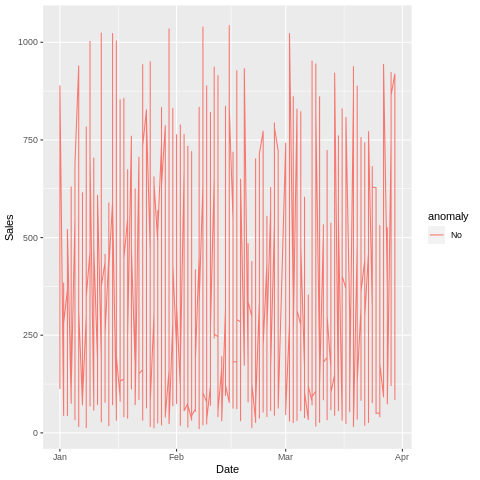

In [102]:
#
%%R
#Plotting data the anomalies
library(ggplot2)
ggplot(anomalies, aes(x=Date, y=Sales,color=anomaly)) + geom_line()
#no anomalies detected

# Follow up Questions
1. Did I have the right data? Yes the data was right for my analysis.
2. Did we need other data? No
3. Did I the right objective Yes, I was able to achieve my objective